In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [24]:
from keras import layers, losses, metrics, models, optimizers 
from keras.datasets import imdb
import numpy as np

In [26]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [5]:
train_data.shape, test_data.shape

((25000,), (25000,))

In [6]:
train_data[0][0:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [7]:
train_labels[0]

1

In [8]:
max([max(seq) for seq in train_data])

9999

In [9]:
word_index = imdb.get_word_index()

In [10]:
type(word_index)

dict

In [11]:
reverse_word_index = {value: key for key, value in word_index.items()}

In [12]:
' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]]
)

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [13]:
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

In [14]:
vectorized_x = vectorize_sequence(train_data)
vectorized_y = np.asarray(train_labels).astype('float32')
x_train = vectorized_x[10000:]
x_val = vectorized_x[0:10000]
y_train = vectorized_y[10000:]
y_val = vectorized_y[0:10000]

x_test = vectorize_sequence(test_data)
y_test = np.asarray(test_labels).astype('float32')


In [16]:
network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]
)

# equivalent code to compile the network
#network.compile(
#    optimizer='rmsprop',
#    loss='binary_crossentropy',
#    metrics=['accuracy']
#)


In [17]:
history = network.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 198us/step - loss: 0.5344 - binary_accuracy: 0.7746 - val_loss: 0.3943 - val_binary_accuracy: 0.8687
Epoch 2/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.3181 - binary_accuracy: 0.8973 - val_loss: 0.3277 - val_binary_accuracy: 0.8713
Epoch 3/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.2343 - binary_accuracy: 0.9245 - val_loss: 0.2862 - val_binary_accuracy: 0.8881
Epoch 4/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.1844 - binary_accuracy: 0.9400 - val_loss: 0.2745 - val_binary_accuracy: 0.8905
Epoch 5/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.1526 - binary_accuracy: 0.9509 - val_loss: 0.2996 - val_binary_accuracy: 0.8806
Epoch 6/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.1225 - bin

In [19]:
type(history), type(history.history)

(keras.callbacks.History, dict)

In [20]:
history.history.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

In [22]:
type(history.history['val_loss']), len(history.history['val_loss'])

(list, 20)

In [23]:
def adjust_axes(axis_obj, x_label_fontsize, y_label_fontsize, x_label_rotation=0, y_label_rotation=0):
    for tick in axis_obj.xaxis.get_major_ticks():
        tick.label.set_fontsize(x_label_fontsize)
    for tick in axis_obj.yaxis.get_major_ticks():
        tick.label.set_fontsize(y_label_fontsize)
    for tick in axis_obj.xaxis.get_major_ticks():
        tick.label.set_rotation(x_label_rotation)
    for tick in axis_obj.yaxis.get_major_ticks():
        tick.label.set_rotation(y_label_rotation)        

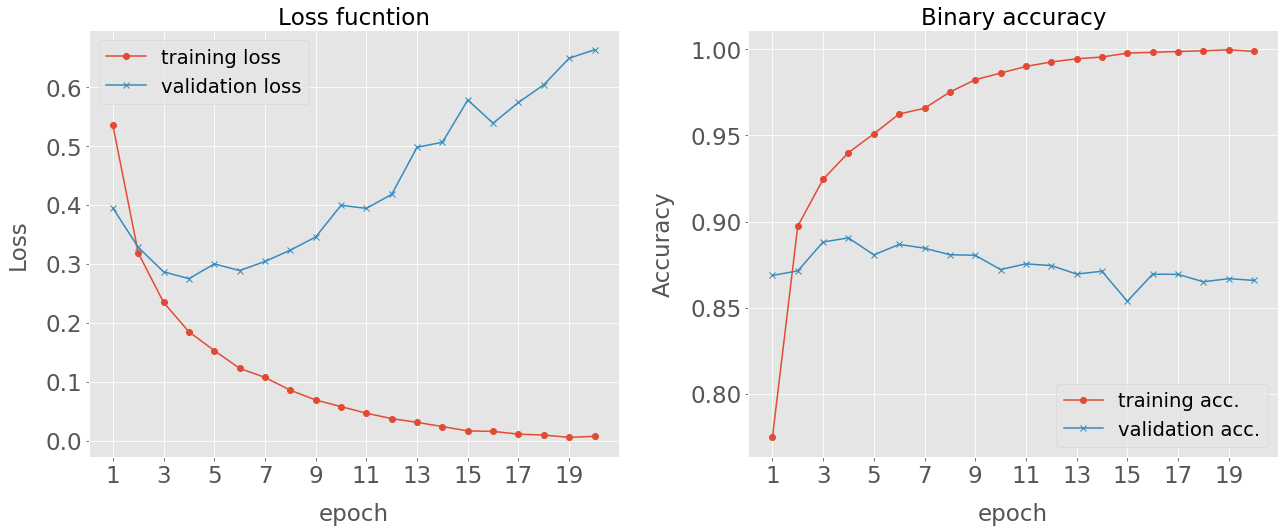

In [44]:
FONTSIZE = 23
plt.close('all')
fig = plt.figure(figsize=(18, 7.5))
gs = matplotlib.gridspec.GridSpec(1, 2, width_ratios=[1, 1])

epochs = range(1, len(history.history['loss']) + 1)

# plot loss function
train_loss = history.history['loss']
val_loss = history.history['val_loss']
ax = plt.subplot(gs[0, 0])
ax.plot(epochs, train_loss, marker='o', label='training loss')
ax.plot(epochs, val_loss, marker='x', label='validation loss')
ax.set_xlabel('epoch', fontsize=FONTSIZE, labelpad=15)
ax.set_ylabel('Loss', fontsize=FONTSIZE, labelpad=15)
ax.set_xticks(np.arange(1, len(epochs)+1, 2))
adjust_axes(ax, FONTSIZE, FONTSIZE, 0, 0)
ax.legend(loc='best', fontsize=FONTSIZE*0.85)
ax.set_title('Loss fucntion', fontsize=FONTSIZE)


# plot acuracy
train_acuracy = history.history['binary_accuracy']
val_accuracy = history.history['val_binary_accuracy']
ax = plt.subplot(gs[0, 1])
ax.plot(epochs, train_acuracy, marker='o', label='training acc.')
ax.plot(epochs, val_accuracy, marker='x', label='validation acc.')
ax.set_xlabel('epoch', fontsize=FONTSIZE, labelpad=15)
ax.set_ylabel('Accuracy', fontsize=FONTSIZE, labelpad=15)
ax.set_xticks(np.arange(1, len(epochs)+1, 2))
adjust_axes(ax, FONTSIZE, FONTSIZE, 0, 0)
ax.legend(loc='best', fontsize=FONTSIZE*0.85)
ax.set_title('Binary accuracy', fontsize=FONTSIZE)

plt.tight_layout(w_pad=3.0, h_pad=1)

### Use 4 epochs to train another model

In [45]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(
    x_train,
    y_train,
    epochs=4,
    batch_size=512
)


Epoch 1/4
15000/15000 [==============================] - 2s 116us/step - loss: 0.5326 - acc: 0.7917
Epoch 2/4
15000/15000 [==============================] - 1s 77us/step - loss: 0.3258 - acc: 0.8987
Epoch 3/4
15000/15000 [==============================] - 1s 67us/step - loss: 0.2357 - acc: 0.9245
Epoch 4/4
15000/15000 [==============================] - 1s 76us/step - loss: 0.1866 - acc: 0.9397


In [46]:
predict_test = model.predict(x_test)

In [47]:
predict_test

array([[0.33494028],
       [0.99959254],
       [0.93451583],
       ...,
       [0.14444977],
       [0.19115263],
       [0.6552095 ]], dtype=float32)

In [48]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 55us/step


In [49]:
results

[0.3013534813213348, 0.87724]